In [1]:
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
PATH = Path('../data/houseprice/')

In [50]:
dftrain = pd.read_csv(PATH/'train.csv')

In [4]:
# from eda import DataMangler
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")

In [70]:
class DataMangler:
    def __init__(self, data):        
        self.data = data if isinstance(data, pd.DataFrame) else pd.DataFrame(data)
        self.stats = {}
        self.categorical_columns = []
        self.categorical_dims = {}

    def drop(self, col):
        if not isinstance(col, list):
            col = [col]

        try:
            for c in col:
                self.data = self.data.drop(c, axis=1)
                del self.stats[c]
        except (IndexError, KeyError) as e:
            print(f'{e}: Invalid index or key')

    def eda(self):
        print(f"Data:\n\
                Shape: \t{self.data.shape}\n\
                ")
        for col in self.data.columns:
            self.stats[col] = [self.data[col].nunique(),
                               self.data[col].unique()[:10],
                               self.data[col].dtype,
                               self.data[col].isnull().sum(),
                               round(100*self.data[col].isnull().sum()/self.data.shape[0], 2)
                              ]
        return pd.DataFrame.from_dict(self.stats, orient='index', columns=['Num Unique', 'First 10 unique', 'Type', 'Missing total', 'Missing relative']).sort_values('Missing relative', ascending=False)

    def impute(self, columns, value):
        columns = columns if isinstance(self.data, list) else list(columns)
        for col in columns:
            self.data[col].fillna(value, inplace=True)    
    
    def plot(self):
        for col in self.data.columns:
            sns.histplot(self.data[col], color="dodgerblue", label="Compact")          

    def process(self):
        for col in self.data.columns:
            if self.data[col].dtype=='object' or self.data[col].nunique() < 200:
                self.data[col].fillna('missing', inplace=True)
                l_enc = LabelEncoder()
                l_enc.fit(self.data[col].astype(str))
                self.data[col] = l_enc.transform(self.data[col].astype(str))        
                self.categorical_columns.append(col)
                self.categorical_dims[col] = len(l_enc.classes_)
            if self.data[col].nunique() >= 200:        
                self.data.fillna(self.data[col].mean(), inplace=True)

In [135]:
dftrain['PoolQC'].fillna('NA', inplace=True)
dftrain['Fence'].fillna('NA', inplace=True)
dftrain['BsmtQual'].fillna('NA', inplace=True)
dftrain['BsmtCond'].fillna('NA', inplace=True)
dftrain['BsmtExposure'].fillna('NA', inplace=True)
dftrain['BsmtFinType1'].fillna('NA', inplace=True)
dftrain['BsmtFinType2'].fillna('NA', inplace=True)
dftrain['Electrical'].fillna('Missing', inplace=True)
dftrain['FireplaceQu'].fillna('NA', inplace=True)
dftrain['GarageFinish'].fillna('NA', inplace=True)
dftrain['GarageQual'].fillna('NA', inplace=True)
dftrain['GarageCond'].fillna('NA', inplace=True)
dftrain['GarageType'].fillna('NA', inplace=True)
dftrain['GarageYrBlt'].fillna(0, inplace=True)
dftrain['MasVnrArea'].fillna(0., inplace=True)
dftrain['MasVnrType'].fillna('None', inplace=True)
dftrain['MiscFeature'].fillna('NA', inplace=True)

In [71]:
dm = DataMangler(dftrain)

In [76]:
dm.eda()

Data:
                Shape: 	(1460, 80)
                


,Num Unique,First 10 unique,Type,Missing total,Missing relative
LotFrontage,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",float64,259,17.74
GarageYrBlt,97,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",float64,81,5.55
MasVnrArea,327,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",float64,8,0.55
MSSubClass,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85]",int64,0,0.00
KitchenAbvGr,4,"[1, 2, 3, 0]",int64,0,0.00
GarageType,7,"[Attchd, Detchd, BuiltIn, CarPort, NA, Basment...",object,0,0.00
FireplaceQu,6,"[NA, TA, Gd, Fa, Ex, Po]",object,0,0.00
Fireplaces,4,"[0, 1, 2, 3]",int64,0,0.00
Functional,7,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]",object,0,0.00
TotRmsAbvGrd,12,"[8, 6, 7, 9, 5, 11, 4, 10, 12, 3]",int64,0,0.00


In [9]:
pd.set_option('display.max_rows', None)

In [67]:
dm.drop('Id')

"['Id'] not found in axis": Invalid index or key


In [73]:
dm.impute([x for x in dftrain.columns if dftrain[x].dtype == 'object'], 'NA')

In [75]:
dm.drop('Id')

In [144]:
import numpy as np

In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
y_imputed = imputer.fit_transform(y)

### Regression Imputation

In [144]:
import numpy as np
from sklearn.linear_model import LinearRegression

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

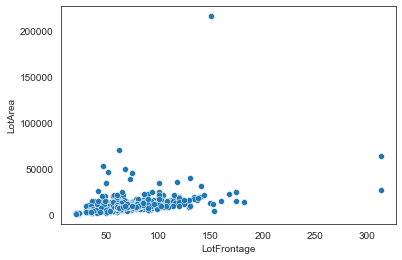

In [141]:
#sns.histplot(dftrain['GarageType'].fillna('Missing'), color='dodgerblue')
#sns.histplot(dftrain['GarageYrBlt'], color='red')
sns.scatterplot(x=dftrain['LotFrontage'], y=dftrain['LotArea'])

In [153]:
df = pd.concat([dftrain['LotFrontage'], dftrain['LotArea']], axis=1)

In [164]:
df.mean()

LotFrontage       70.049958
LotArea        10516.828082
dtype: float64

In [142]:
regdf = df[(tempdf['LotFrontage'].isna()==False) & (tempdf['LotArea'] < 200000)]

In [161]:
y = np.array(regdf['LotFrontage']).reshape(-1, 1)
X = np.array(regdf['LotArea']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)

In [162]:
reg.score(X, y), reg.intercept_

(0.2888128132759462, array([45.81603234]))

In [163]:
reg.predict(np.array(10382).reshape(-1, 1))

array([[71.46930356]])

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

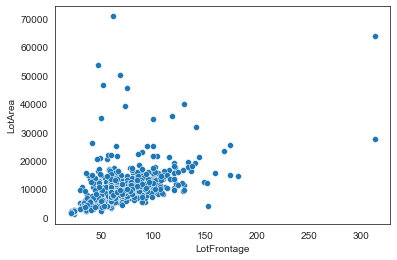

In [138]:
sns.scatterplot(x=tdpf['LotFrontage'], y=tdpf['LotArea'])

In [124]:
tempdf

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
5,85.0,14115
6,75.0,10084
7,NaN,10382
8,51.0,6120
9,50.0,7420


In [ ]:
dftrain[dftrain.isna().any(axis=1)]

In [130]:
dfgarage=pd.concat([dftrain['GarageYrBlt'].fillna('0000'), dftrain['GarageType']], axis=1)

In [131]:
dfgarage[dfgarage.isna().any(axis=1)]

,GarageYrBlt,GarageType
39,0000,NaN
48,0000,NaN
78,0000,NaN
88,0000,NaN
89,0000,NaN
99,0000,NaN
108,0000,NaN
125,0000,NaN
127,0000,NaN
140,0000,NaN


<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

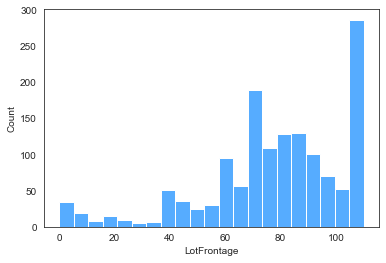

In [56]:
# plt.figure(figsize=(5,3), dpi = 100)
sns.histplot(dftrain['LotFrontage'], color="dodgerblue")

In [274]:
dm.eda()

Data:
                Shape: 	(1460, 80)
                
'MSSubClass':
                  Num Unique: 		15
                  First 10 Unique: 	[ 60  20  70  50 190  45  90 120  30  85]
                  Type: 		int64
                  Missing total 	0
                  Missing relative: 	0.0%
                  
'MSZoning':
                  Num Unique: 		5
                  First 10 Unique: 	['RL' 'RM' 'C (all)' 'FV' 'RH']
                  Type: 		object
                  Missing total 	0
                  Missing relative: 	0.0%
                  
'LotFrontage':
                  Num Unique: 		110
                  First 10 Unique: 	[65. 80. 68. 60. 84. 85. 75. nan 51. 50.]
                  Type: 		float64
                  Missing total 	259
                  Missing relative: 	17.74%
                  
'LotArea':
                  Num Unique: 		1073
                  First 10 Unique: 	[ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]
                  Type: 		int64
   

In [ ]:
dm.plot()